In [1]:
import numpy as np
import pandas as pd

Linear regression generally have the form of $Y_{i} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ...$ <br>
There are several ways to find the coefficients of the regression: <br>
1. Linear Algebra: $\hat{\theta} = (X^{T}X)^{-1}X^{T}Y$ (When X is invertible) <br>
2. Gradient Descent: In this case, we need to write out the loss function and try to minimize the loss. <br>
$\hspace{30mm}$ $F(x)$ = Loss Function = SE = $ \sum^{n}_{i=1} (Y_{i} - \hat{Y_{i}})^{2}$ <br>

In [57]:
class Linear_Regression():
    def __init__(self, alpha = 1e-10 , num_iter = 10000, early_stop = 1e-50, intercept = True, init_weight = None):
        
        
        """
            Some initializations, if neccesary
            
            attributes: 
                        alpha: Learning Rate, default 1e-10
                        num_iter: Number of Iterations to update coefficient with training data
                        early_stop: Constant control early_stop.
                        intercept: Bool, If we are going to fit a intercept, default True.
                        init_weight: Matrix (n x 1), input init_weight for testing.
                        
            
            TODO: 1. Initialize all variables needed.
        """
        
        self.model_name = 'Linear Regression'
        
        self.alpha = alpha
        self.num_iter = num_iter
        self.early_stop = early_stop
        self.intercept = intercept
        self.init_weight = init_weight  ### For testing correctness.
        
    
    def fit(self, X_train, y_train):
        """
            Save the datasets in our model, and perform gradient descent.
            
            Parameter:
                X_train: Matrix or 2-D array. Input feature matrix.
                Y_train: Matrix or 2-D array. Input target value.
                
                
                TODO: 2. If we are going to fit the intercept, add a col with 
                         all 1's to the first column. (hint: np.hstack, np.ones)
                      3. Initilaize our coef with uniform from [-1, 1] with the 
                         number of col in training set.
                      4. Call the gradient_descent function to train.
        """
        self.X = self.min_max_normaliz(np.mat(X_train))
        self.y = np.mat(y_train).T
        
        if self.intercept:
            ones = np.ones((self.X.shape[0], 1))
            self.X = np.hstack((ones, self.X))
        
        if self.init_weight is None:
            self.coef = np.random.uniform(-1, 1, self.X.shape[1])
        else:
            self.coef = self.init_weight #### Please change this after you get the example right.
        
        self.gradient_descent()
        
    def gradient(self):
        """
            Helper function to calculate the gradient respect to coefficient.
            
            TODO: 5. Think about the matrix format of the gradient of the loss 
                     function.
        """
        #print("X : ", self.X)
        #print("y : ", self.y)
        #print("w : ", self.coef)
        #print(f'product: {(self.X @ self.coef)}')

        self.grad_coef = (-2/self.X.shape[0]) * self.X.T @ (self.y - self.X @ self.coef)

    def calculate_loss(self, w):
        """
        Calculates the loss for the given weight vector, w
        """
        return (
            np.sum(
                np.square(self.y - self.X @ w)
            )
            / 
            self.X.shape[0]
        )
    
    def min_max_normaliz(self, lst):
        """
        Helper function for normalize for faster training.
        """
        maximum = np.max(lst)
        minimum = np.min(lst)

        return (lst - minimum) / (maximum - minimum)
        
    def gradient_descent(self):
        
        """
            Training function
            
            TODO: 6. Calculate the loss with current coefficients.
                  7. Update the temp_coef with learning rate and gradient.
                  8. Calculate the loss with temp_coef.
                  
                  9. Implement the self adeptive learning rate. 
                      a. If current error is less than previous error, increase 
                         learning rate by a factor 1.3. 
                         And update coef, with temp_coef.
                      b. If previous error is less than current error, decrease 
                         learning rate by a factor of 0.9.
                         Don't update coef.
                  10. Add the loss to loss list we create.
        """
        self.loss = [ self.calculate_loss(self.coef) ]
        
        for i in range(self.num_iter):
 
            self.gradient()

            previous_y_hat = self.X @ self.coef
            
            temp_coef = self.coef - self.alpha * self.grad_coef
            
            ones = 0  # Matrix with 1's (1 x n), help with calculate the sum of a mattrix. hint: Think about dot product.
            
            pre_error = self.loss[-1]
            
            # current_error = sum((self.y - self.X @ temp_coef)**2)
            current_error = self.calculate_loss(temp_coef)
            
            ### This is the early stop, don't modify fllowing three lines.
            if (abs(pre_error - current_error) < self.early_stop) | (abs(abs(pre_error - current_error) / pre_error) < self.early_stop):
                self.coef = temp_coef
                return self
            
            if current_error <= pre_error:
                self.alpha *= 1.3
            else:
                self.alpha *= 0.9
                
            self.loss.append(current_error)
            self.coef = temp_coef
            
            if i % 10000 == 0:
                print('\nIteration: ' +  str(i))
                print('\nCoef: '+ str(self.coef))
                print('\nGradient: '+ str(self.grad_coef))
                print('\nLoss: ' + str(current_error))            
        return self
    
    def ind_predict(self, x: list):
        """
            Predict the value based on its feature vector x.

            Parameter:
            x: Matrix, array or list. Input feature point.
            
            Return:
                result: prediction of given data point
        """
        
        """
            TODO: 11. Implement the prediction function
        """
        result = x @ self.coef

        return result
    
    def predict(self, X):
        """
            X is a matrix or 2-D numpy array, represnting testing instances. 
            Each testing instance is a feature vector. 
            
            Parameter:
            X: Matrix, array or list. Input feature point.
            
            Return:
                ret: prediction of given data matrix
        """
        
        """
            TODO: 12. Make sure add the 1's column like we did to add intercept.
                  13. Revise the following for-loop to call ind_predict to get 
                      predictions.

        """
        
        ret = []
        X = np.mat(X)
        if self.intercept:
            ones = np.ones((X.shape[0], 1))
            X = np.hstack((ones, X))
        for x in X:
            ret.append(self.ind_predict(x))
        return ret
        
        


In [58]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
def min_max_normaliz(lst):
    """
    Helper function for normalize for faster training.
    """
    maximum = np.max(lst)
    minimum = np.min(lst)

    return (lst - minimum) / (maximum - minimum)

### We generate some easy data for testing. We should fit a line with, $Y = 30 * X + 20$

In [60]:
X = np.array(np.mat(np.arange(1, 1000, 5)).T)
y = np.array((30 * X)).flatten() +  20

In [61]:
def calculate_loss(y, X, w):
    """
    Calculates the loss for the given weight vector, w
    """
    return (
        np.sum(
            np.square(y - X @ w)
        )
        / 
        X.shape[0]
    )

gradient: [9996.88143086 1656.74206038]
w: [13974.09633883  9833.63826098]
gradient: [ 404.21767831 -754.76139304]
w: [ 3053.73447739 24241.38132717]
gradient: [ 106.18796855 -198.27578892]
w: [  839.08093169 28376.61609035]
gradient: [ 27.89557525 -52.08704212]
w: [  257.29153041 29462.9421036 ]
gradient: [  7.32816655 -13.68326396]
w: [  104.45547707 29748.3199055 ]


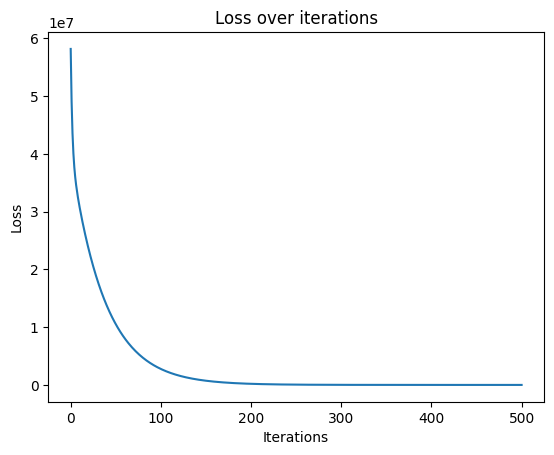

In [71]:
X_normalized = min_max_normaliz(X)
ones = np.ones((X_normalized.shape[0], 1))
X_ones = np.hstack((ones, X_normalized))
coef = np.array([np.random.uniform(-1, 1) for _ in range(X_ones.shape[1])])

# -2 * X_ones.T @ (y - X_ones @ coef)
coef = (1/X_ones.shape[0]) * X_ones.T @ (y - X_ones @ coef)
lr = 0.1

sum((y - X_ones @ coef)**2)
# losses = [ np.sum((y- X_ones @ coef)**2) ]
losses = [ calculate_loss(y, X_ones, coef) ]
for i in range(500):
    gradient = (-2/X_ones.shape[0]) * X_ones.T @ (y - X_ones @ coef)
    coef = coef - lr * gradient
    if i % 100 == 0:
        print(f'gradient: {gradient}')
        print(f'w: {coef}')

    # losses.append(sum((y-X_ones @ coef)**2))
    losses.append(calculate_loss(y, X_ones, coef))
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()



#### Do NOT modify the following line, just run it when you are done.  You can also try different initialization, you will notice different coef at the end.

In [72]:
clf = Linear_Regression(alpha = .000001, num_iter = 10000000, init_weight= np.mat([15,25]).T)
clf.fit(X,y)

grad_coef:  [[-29895.        ]
 [-19968.29145729]]
coef:  [[15]
 [25]]

Iteration: 0

Coef: [[15.029895  ]
 [25.01996829]]

Gradient: [[-29895.        ]
 [-19968.29145729]]

Loss: 298299016.4147191
grad_coef:  [[-29894.92024171]
 [-19968.24821664]]
coef:  [[15.029895  ]
 [25.01996829]]
grad_coef:  [[-29894.81655619]
 [-19968.19200395]]
coef:  [[15.0687584 ]
 [25.04592701]]
grad_coef:  [[-29894.68176547]
 [-19968.11892769]]
coef:  [[15.11928064]
 [25.07967326]]
grad_coef:  [[-29894.50653828]
 [-19968.02392895]]
coef:  [[15.18495925]
 [25.12354322]]
grad_coef:  [[-29894.27874421]
 [-19967.90043127]]
coef:  [[15.27034095]
 [25.18057389]]
grad_coef:  [[-29893.98261406]
 [-19967.73988544]]
coef:  [[15.38133632]
 [25.25471331]]
grad_coef:  [[-29893.59764851]
 [-19967.53117781]]
coef:  [[15.52562886]
 [25.35109377]]
grad_coef:  [[-29893.09719942]
 [-19967.25986119]]
coef:  [[15.71320675]
 [25.47638707]]
grad_coef:  [[-29892.446626  ]
 [-19966.90715513]]
coef:  [[15.95705393]
 [25.63926614]]
g

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/vb/08bw66p50l7fsmzng9tj5m9h0000gn/T/ipykernel_1420/1834116090.py:134: RuntimeWarning: invalid value encountered in scalar subtract
  if (abs(pre_error - current_error) < self.early_stop) | (abs(abs(pre_error - current_error) / pre_error) < self.early_stop):
/var/folders/vb/08bw66p50l7fsmzng9tj5m9h0000gn/T/ipykernel_1420/1834116090.py:83: RuntimeWarning: overflow encountered in square
  np.square(self.y - self.X @ w)
/var/folders/vb/08bw66p50l7fsmzng9tj5m9h0000gn/T/ipykernel_1420/1834116090.py:83: RuntimeWarning: invalid value encountered in matmul
  np.square(self.y - self.X @ w)
/var/folders/vb/08bw66p50l7fsmzng9tj5m9h0000gn/T/ipykernel_1420/1834116090.py:72: RuntimeWarning: invalid value encountered in matmul
  self.grad_coef = (-2/self.X.shape[0]) * self.X.T @ (self.y - self.X @ self.coef)
/var/

grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 [nan]]
coef:  [[nan]
 [nan]]
grad_coef:  [[nan]
 

KeyboardInterrupt: 

####  As the number of iteration increase, you should notice the coeficient converges to [20, 30]. 
#### It maybe very slow update. Feel free to stop.

In [109]:
clf.coef

AttributeError: 'Linear_Regression' object has no attribute 'coef'

In [35]:
np.array(clf.predict(X))


KeyboardInterrupt



#### Please try to normalize the X and fit again with normalized X. You should find something interesting. Also think about what you should do for predicting.

##### You can also try this with the wine dataset we use in HW1. Try fit this function to that dataset with same features. If you look closely to the updates of coefficients. What do you find? This could be mentioned in your report. 

In [4]:
from sklearn.linear_model import LinearRegression

In [3]:
url_Wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url_Wine, delimiter=';')
X = wine[['density','alcohol']]
y = wine.quality

In [6]:
lr = LinearRegression()
lr.fit(X,y)
## Squared Error with sklearn.
sum((lr.predict(X) - y)**2)

800.6676988774342

#### You will notice different coefficients, but the loss is very close to each other like 805. In your report, briefly discuss this problem.

In [ ]:
clf = Linear_Regression(alpha = 1, num_iter = 5000000)
clf.fit(X,y)

In [ ]:
sum((clf.predict(X) - y)**2)